### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [ ]:
# фрагмент из descents.py
def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
    """
    Вычисление значения функции потерь с использованием текущих весов.

    Parameters
    ----------
    x : np.ndarray
        Массив признаков.
    y : np.ndarray
        Массив целевых переменных.

    Returns
    -------
    float
        Значение функции потерь.
    """
    y_pred = self.predict(x)  # прогноз

    if self.loss_function == LossFunction.MSE:
        error = y - y_pred  # ошибки: истина - прогноз
        return np.mean(error ** 2)  # возврат MSE


def predict(self, x: np.ndarray) -> np.ndarray:
    """
    Расчет прогнозов на основе признаков x.

    Parameters
    ----------
    x : np.ndarray
        Массив признаков.

    Returns
    -------
    np.ndarray
        Прогнозируемые значения.
    """

    y_pred = x.dot(self.w) # в вектор весов добавляется w0

    return y_pred

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

In [ ]:
# фрагмент из descents.py
def update_weights(self, gradient: np.ndarray) -> np.ndarray:
    """
    Обновление весов на основе градиента.

    Parameters
    ----------
    gradient : np.ndarray
        Градиент функции потерь по весам.

    Returns
    -------
    np.ndarray
        Разность весов (w_{k + 1} - w_k).
    """
    eta = self.lr.lambda_ * (self.lr.s0 / (self.lr.s0 + self.k)) ** self.lr.p # длина шага
    weight_difference = -eta * gradient  # изменение весов
    self.w += weight_difference  # обновляем веса
    self.k += 1

    return weight_difference

def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Вычисление градиента функции потерь по весам.

    Parameters
    ----------
    x : np.ndarray
        Массив признаков.
    y : np.ndarray
        Массив целевых переменных.

    Returns
    -------
    np.ndarray
        Градиент функции потерь по весам.
    """

    if self.loss_function == LossFunction.MSE:
        predictions = self.predict(x)
        error = predictions - y
        gradient = 2 * x.T.dot(error) / len(y)

    return gradient

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

In [ ]:
def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Вычисление градиента функции потерь по мини-пакетам.

    Parameters
    ----------
    x : np.ndarray
        Массив признаков.
    y : np.ndarray
        Массив целевых переменных.

    Returns
    -------
    np.ndarray
        Градиент функции потерь по весам, вычисленный по мини-пакету.
    """
    batch_indices = np.random.randint(0, x.shape[0], size=self.batch_size)
    x_batch = x[batch_indices]
    y_batch = y[batch_indices]
    predictions = self.predict(x_batch)
    error = predictions - y_batch
    if self.loss_function == LossFunction.MSE:
        gradient = 2 * x_batch.T.dot(error) / self.batch_size
    elif self.loss_function == LossFunction.LogCosh:
        gradient = -x_batch.T.dot(np.tanh(error)) / self.batch_size
    else:
        raise NotImplementedError("This loss function is not supported.")

    # Проверка на NaN или бесконечность в градиенте
    if np.any(np.isnan(gradient)) or np.any(np.isinf(gradient)):
        raise ValueError("Градиент содержит NaN или бесконечные значения.")

    return gradient

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

In [ ]:
def update_weights(self, gradient: np.ndarray) -> np.ndarray:
    """
    Обновление весов с использованием момента.

    Parameters
    ----------
    gradient : np.ndarray
        Градиент функции потерь.

    Returns
    -------
    np.ndarray
        Разность весов (w_{k + 1} - w_k).
    """
    eta = self.lr.lambda_  # длина шага
    self.h = self.alpha * self.h + eta * gradient # вектор момента
    weight_difference = -self.h # обновляем веса
    self.w += weight_difference
    return weight_difference

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

In [ ]:
def update_weights(self, gradient: np.ndarray) -> np.ndarray:
    """
    Обновление весов с использованием адаптивной оценки моментов.

    Parameters
    ----------
    gradient : np.ndarray
        Градиент функции потерь.

    Returns
    -------
    np.ndarray
        Разность весов (w_{k + 1} - w_k).
    """
    self.iteration += 1
    self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient # 1 момент среднее
    self.v = self.beta_2 * self.v + (1 - self.beta_2) * (gradient ** 2)  # 2 момент несмещенная оценка дисперсии

    m_corr = self.m / (1 - self.beta_1 ** self.iteration) # коррекция смещения 1 момента
    v_corr = self.v / (1 - self.beta_2 ** self.iteration) # коррекция смещения 2 момента

    eta = self.lr.lambda_  # длина шага текущая
    weight_diff = -eta * (m_corr / ((v_corr ** 0.5) + self.eps))
    self.w += weight_diff

    return weight_diff

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

In [ ]:
from __future__ import annotations

from typing import List

import numpy as np

from descents import BaseDescent
from descents import get_descent


class LinearRegression:
    """
    Класс линейной регрессии.

    Parameters
    ----------
    descent_config : dict
        Конфигурация градиентного спуска.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Критерий остановки по количеству итераций. По умолчанию равен 300.

    Attributes
    ----------
    descent : BaseDescent
        Экземпляр класса, реализующего градиентный спуск.
    tolerance : float
        Критерий остановки для квадрата евклидова нормы разности весов.
    max_iter : int
        Критерий остановки по количеству итераций.
    loss_history : List[float]
        История значений функции потерь на каждой итерации.

    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)

        self.tolerance: float = tolerance
        self.max_iter: int = max_iter

        self.loss_history: List[float] = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Обучение модели линейной регрессии, подбор весов для наборов данных x и y.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        self : LinearRegression
            Возвращает экземпляр класса с обученными весами.

        """
        # TODO: реализовать подбор весов для x и y
        self.loss_history.append(self.calc_loss(x, y))  # функции потерь до обучения

        for i in range(1, self.max_iter + 1):
            weight_difference = self.descent.step(x, y)  # обновление весов
            current_loss = self.calc_loss(x, y)
            self.loss_history.append(current_loss)  # текущая функция потерь
            if np.linalg.norm(weight_difference) < self.tolerance: # Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога
                print(f"Сходимость на {i+1} итерации")
                break

            if np.isnan(current_loss) or np.any(np.isnan(self.descent.w)): # В векторе весов появляются значения NaN
                print("Обнаружен NaN в векторе весов")
                break


        #raise NotImplementedError('Функция fit класса LinearRegression не реализована')

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Прогнозирование целевых переменных для набора данных x.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.

        Returns
        -------
        prediction : np.ndarray
            Массив прогнозируемых значений.
        """
        return self.descent.predict(x)

    def score(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Вычисление коэффициента детерминации R^2.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        r2 : float
            Значение коэффициента детерминации R^2.
        """
        y_pred = self.predict(x)
        chisl = np.sum((y - y_pred) ** 2)
        znamen = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (chisl / znamen)
        return r2

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Расчёт значения функции потерь для наборов данных x и y.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        loss : float
            Значение функции потерь.
        """
        return self.descent.calc_loss(x, y)


## Задание 3. Проверка кода (0 баллов)

In [29]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [31]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [76]:
descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [9]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Total iterations: 10


## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



## Part 1 Визуализация распределения целевой переменной:


In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [11]:
data = pd.read_csv('autos.csv')

In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

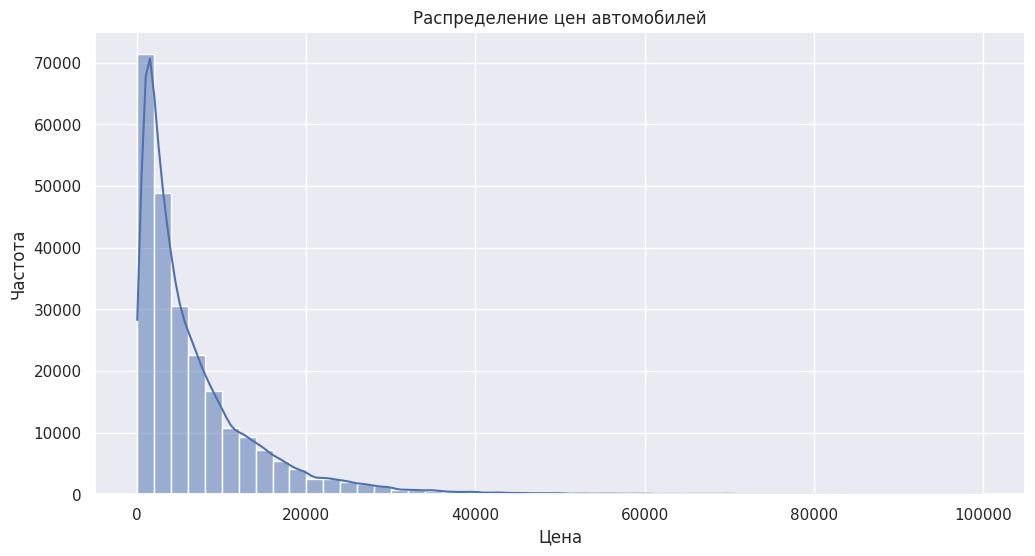

In [ ]:
# График распределения целевой переменной
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Распределение цен автомобилей')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Распределение скошено влево, в основном это низкобюджетные и среднебюджетные автомобили, попробуем прологарифмировать распределение


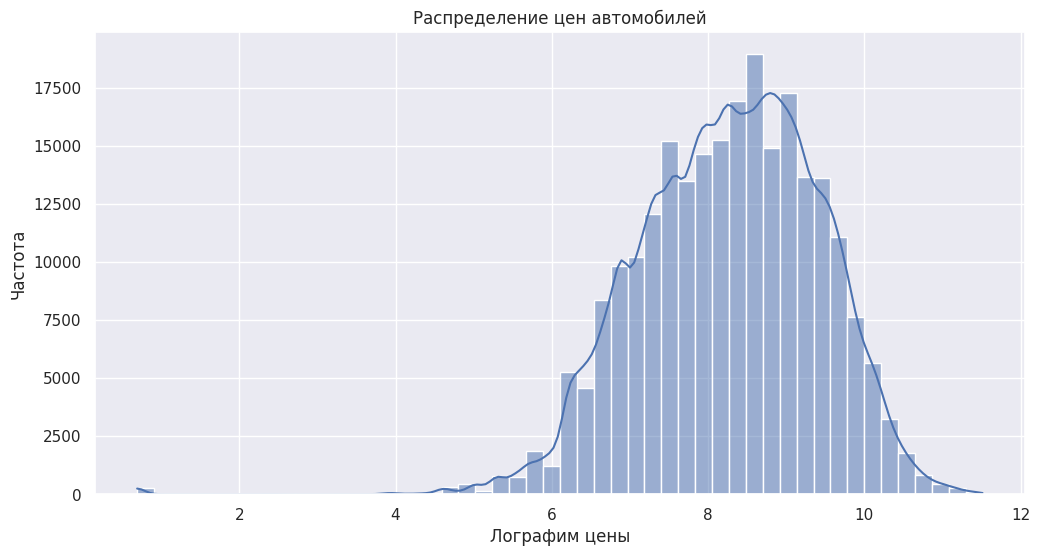

In [12]:
data['log_price'] = np.log1p(data['price'])
plt.figure(figsize=(12, 6))
sns.histplot(data['log_price'], bins=50, kde=True)
plt.title('Распределение цен автомобилей')
plt.xlabel('Лографим цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Распределение выровнялось, но остаются выбросы слишком бюджетных авто

1-й квартиль (Q1): 7.467942332285852
3-й квартиль (Q3): 9.104979856318357
IQR: 1.6370375240325048
Нижняя граница: 5.012386046237095
Верхняя граница: 11.560536142367114


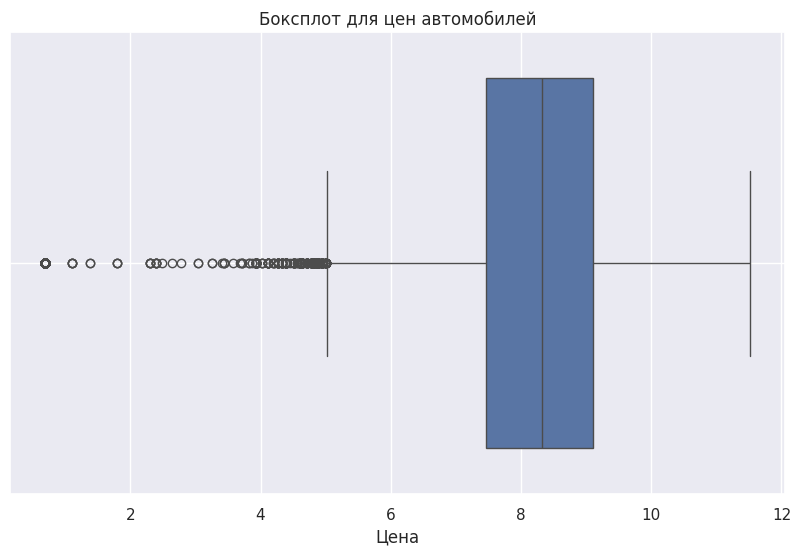

Число выбросов: 791
Общее число выборки: 241190
% Выбросов: 0.32795721215639123


In [13]:
# Статистический анализ: расчет межквартильного размаха
Q1 = data['log_price'].quantile(0.25)
Q3 = data['log_price'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"1-й квартиль (Q1): {Q1}")
print(f"3-й квартиль (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

# боксплот
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['log_price'])
plt.title('Боксплот для цен автомобилей')
plt.xlabel('Цена')
plt.grid(True)
plt.show()

outliers = data[(data['log_price'] < lower_bound) | (data['log_price'] > upper_bound)]
print(f"Число выбросов: {len(outliers)}")
print(f"Общее число выборки: {len(data)}")
print(f"% Выбросов: {len(outliers) * 100 / len(data)}")

## Part 2 Удаление выбросов:


In [14]:
data_no_outliers = data[~((data['log_price'] < lower_bound) | (data['log_price'] > upper_bound))]
len(data_no_outliers)

240399

## Part 3 Исследование данных:

In [15]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (EDA)

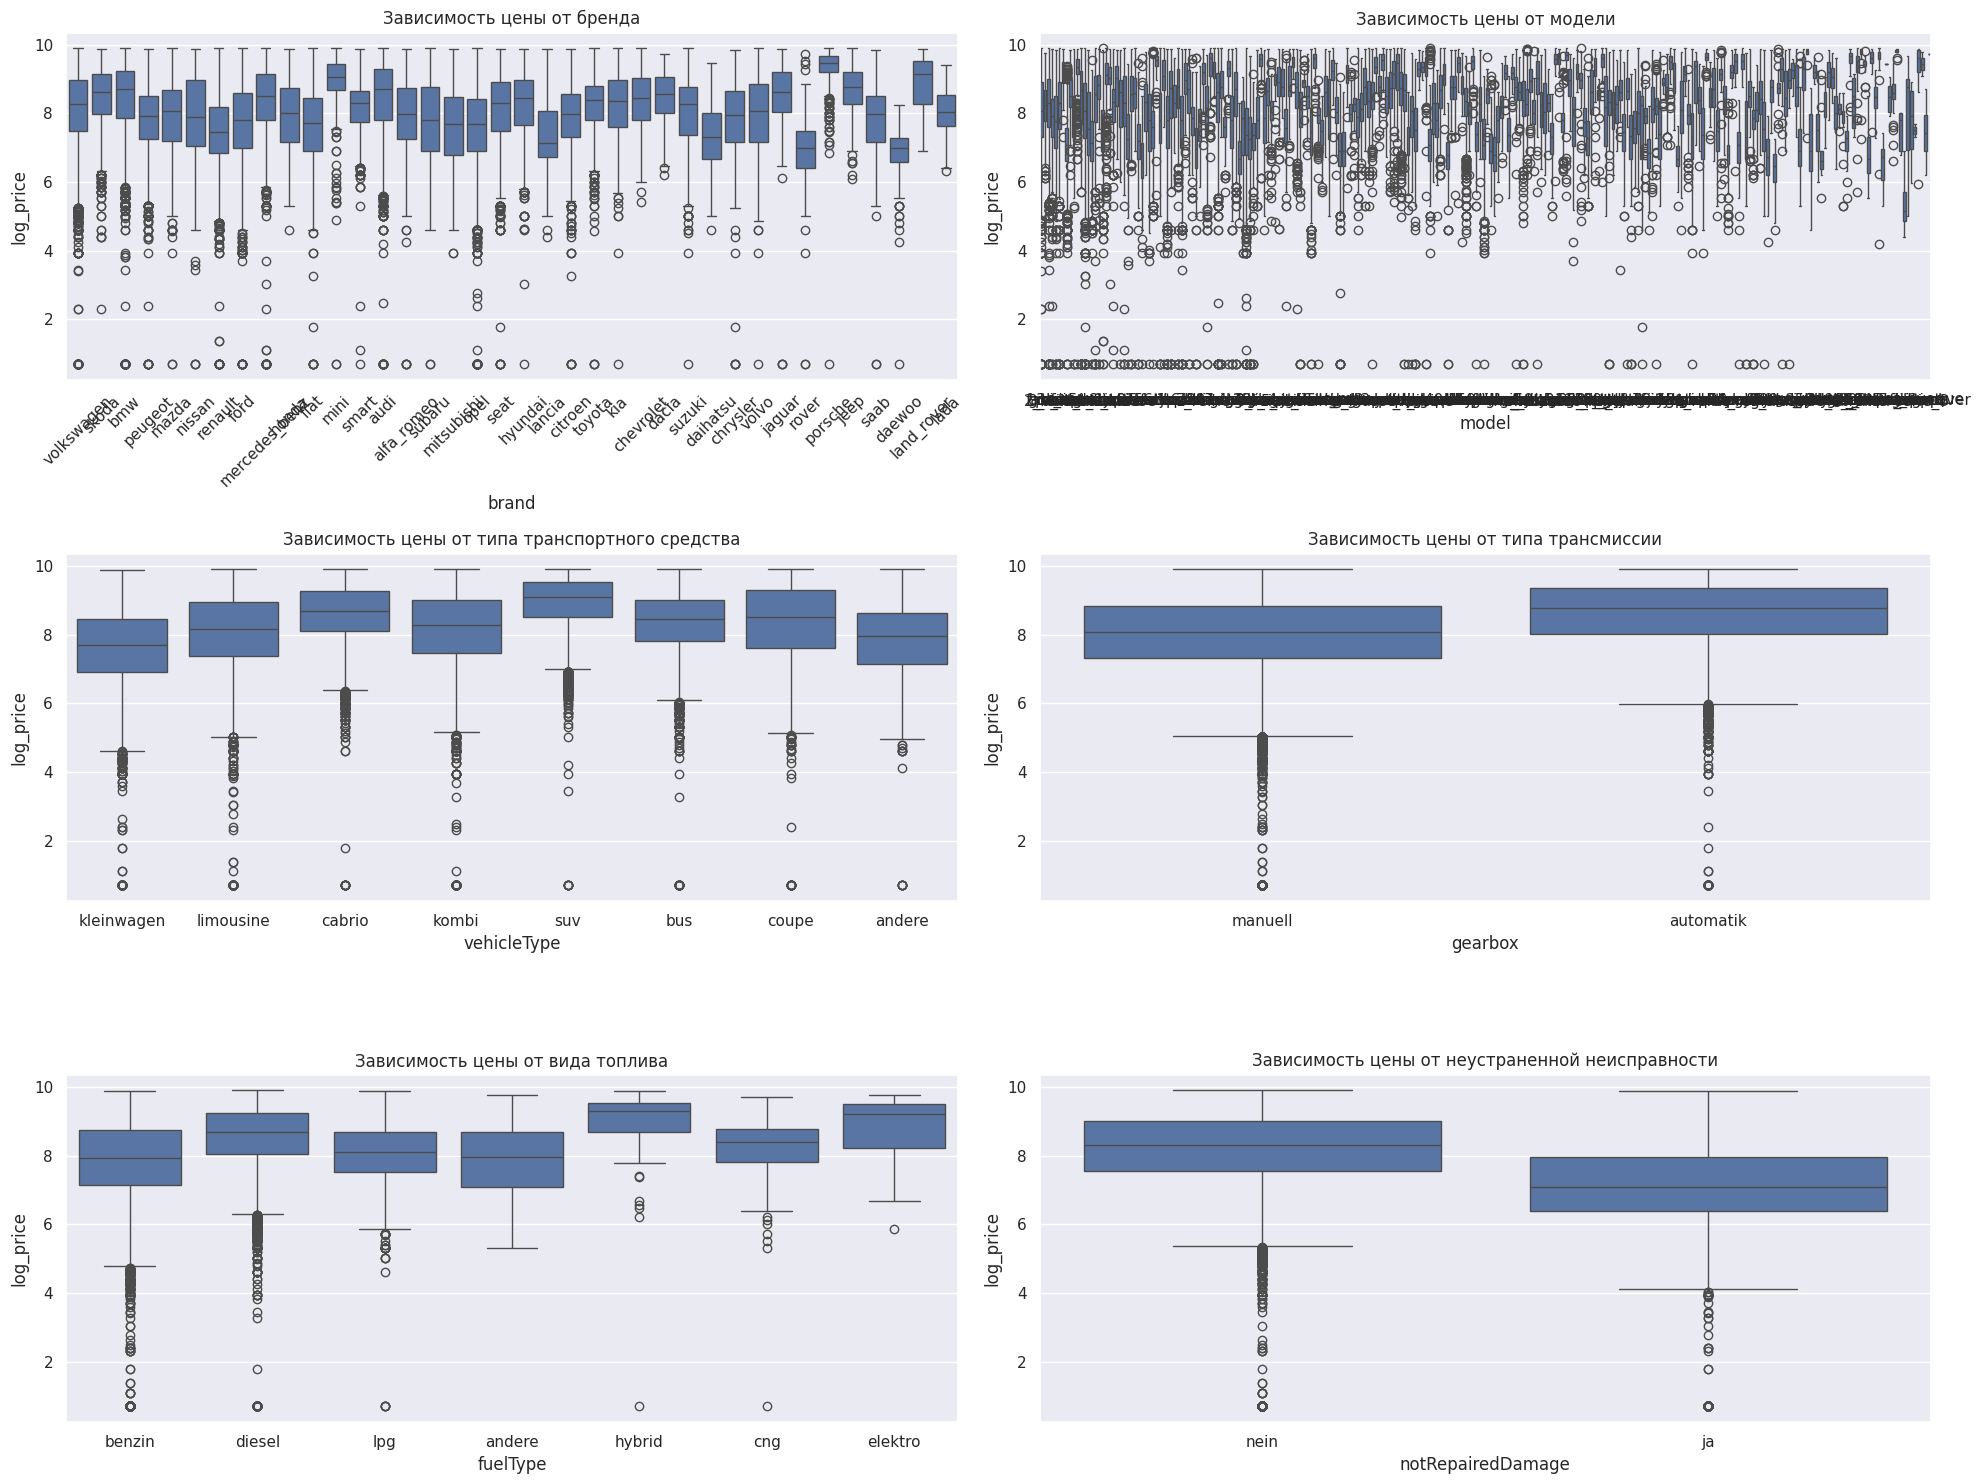

In [ ]:
plt.figure(figsize=(20, 15))

# Графики для категориальных признаков
plt.subplot(3, 2, 1)
sns.boxplot(x='brand', y='log_price', data=data_no_outliers)
plt.title('Зависимость цены от бренда')
plt.xticks(rotation=45)

plt.subplot(3, 2, 2)
sns.boxplot(x='model', y='log_price', data=data_no_outliers)
plt.title('Зависимость цены от модели')

plt.subplot(3, 2, 3)
sns.boxplot(x='vehicleType', y='log_price', data=data_no_outliers)
plt.title('Зависимость цены от типа транспортного средства')

plt.subplot(3, 2, 4)
sns.boxplot(x='gearbox', y='log_price', data=data_no_outliers)
plt.title('Зависимость цены от типа трансмиссии')

plt.subplot(3, 2, 5)
sns.boxplot(x='fuelType', y='log_price', data=data_no_outliers)
plt.title('Зависимость цены от вида топлива')

plt.subplot(3, 2, 6)
sns.boxplot(x='notRepairedDamage', y='log_price', data=data_no_outliers)
plt.title('Зависимость цены от неустраненной неисправности')

plt.tight_layout()
plt.show()

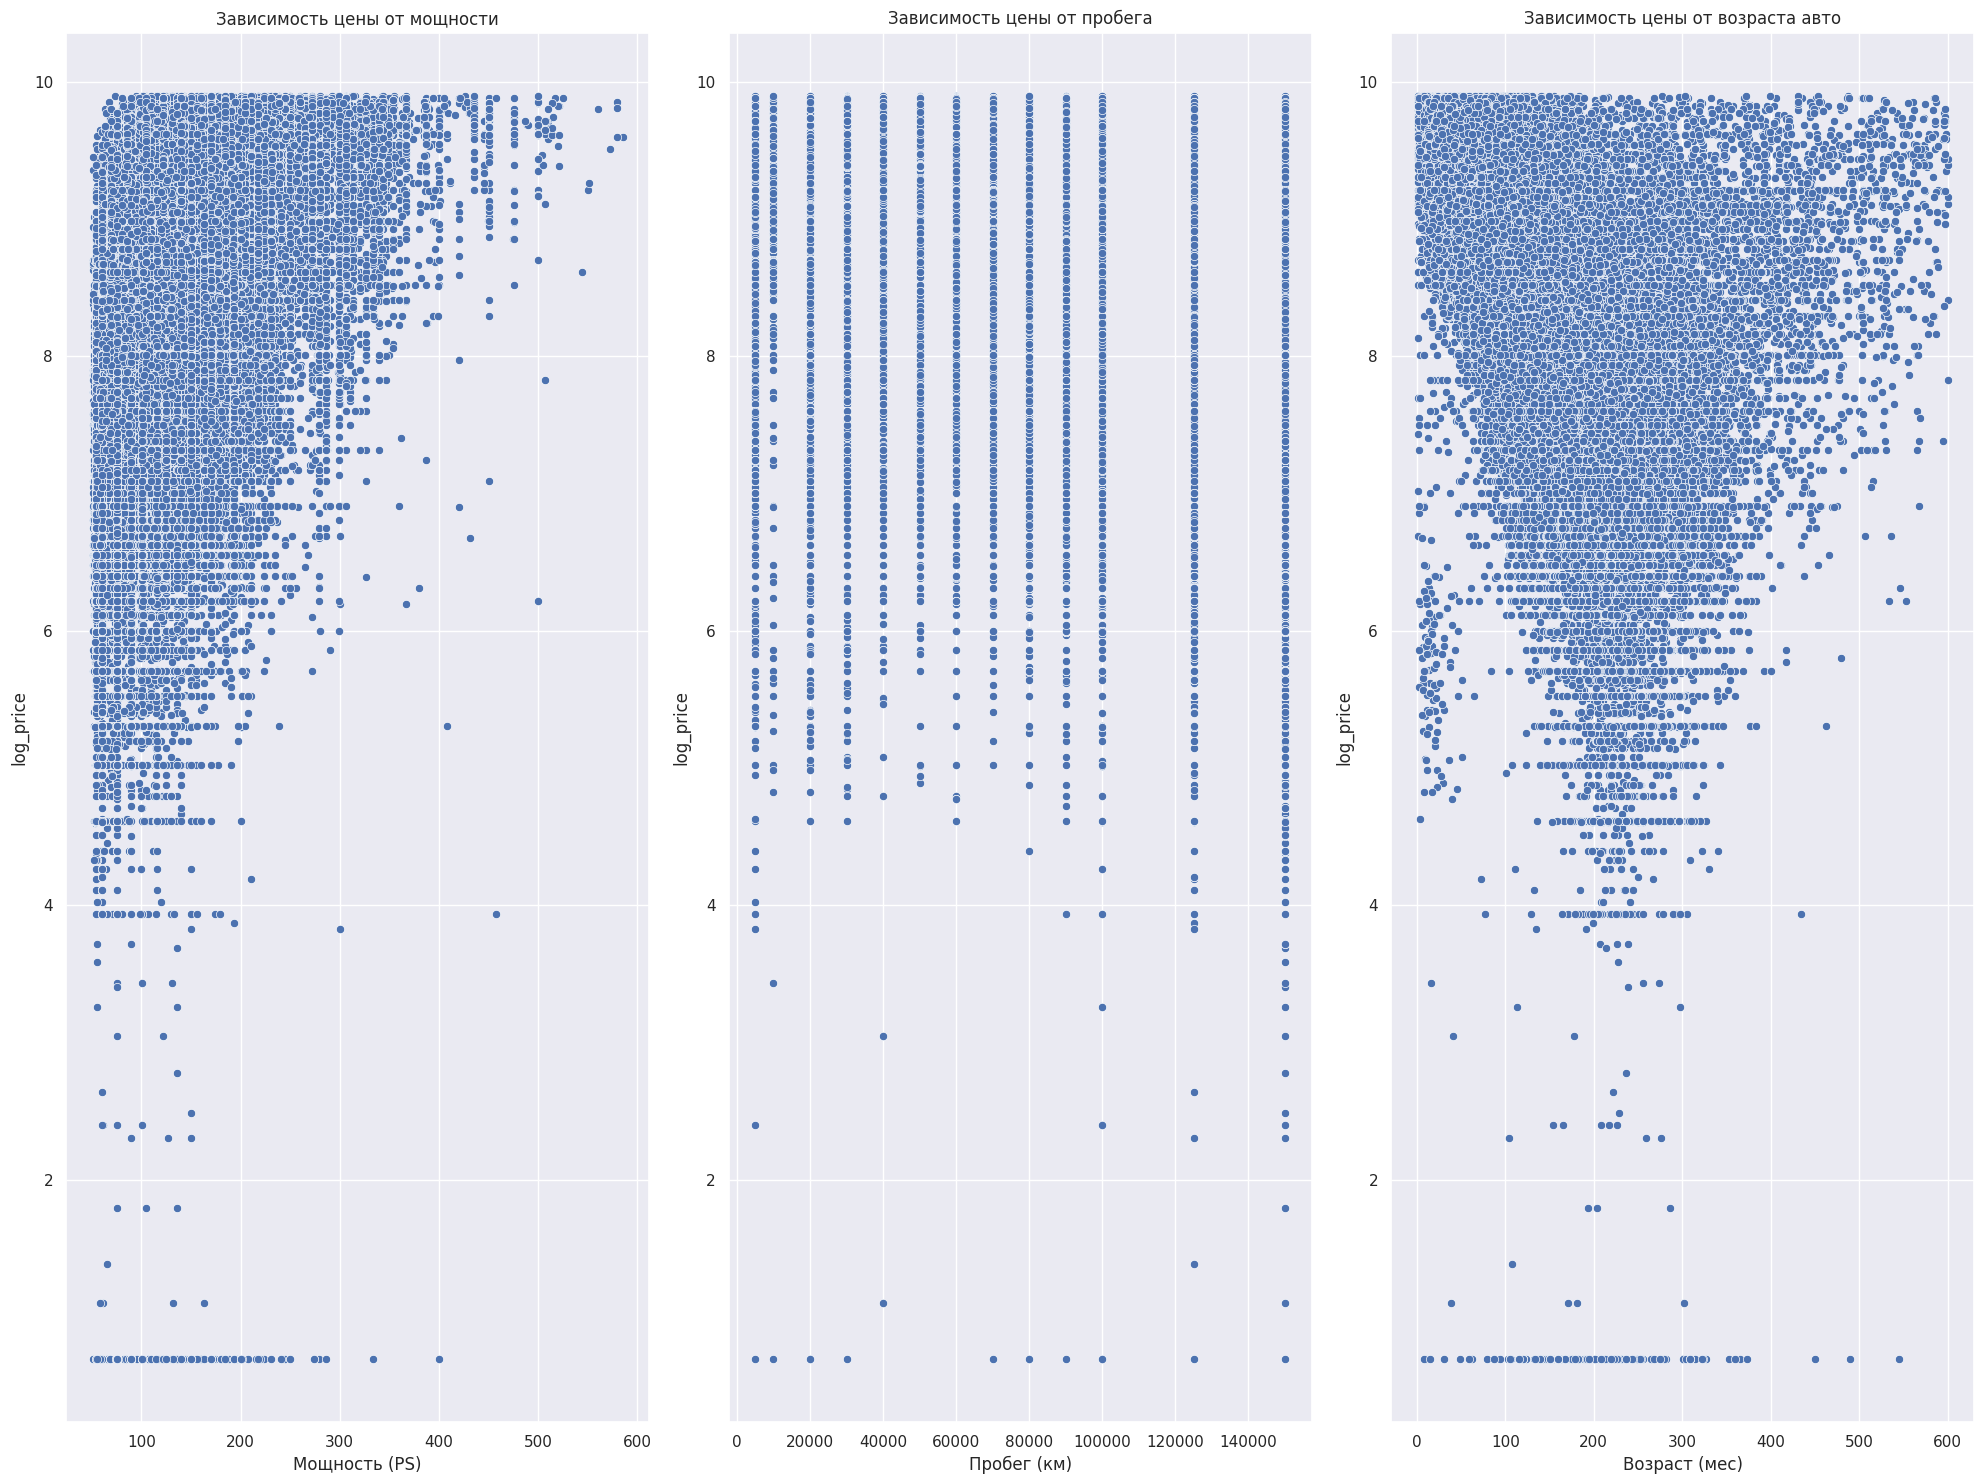

In [ ]:
plt.figure(figsize=(20, 15))

# Графики для числовых признаков
plt.subplot(1, 3, 1)
sns.scatterplot(x='powerPS', y='log_price', data=data_no_outliers)
plt.title('Зависимость цены от мощности')
plt.xlabel('Мощность (PS)')

plt.subplot(1, 3, 2)
sns.scatterplot(x='kilometer', y='log_price', data=data_no_outliers)
plt.title('Зависимость цены от пробега')
plt.xlabel('Пробег (км)')

plt.subplot(1, 3, 3)
sns.scatterplot(x='autoAgeMonths', y='log_price', data=data_no_outliers)
plt.title('Зависимость цены от возраста авто')
plt.xlabel('Возраст (мес)')

plt.tight_layout()
plt.show()

In [16]:
data_no_outliers = data_no_outliers.copy()
data_no_outliers['bias'] = 1
other += ['bias']

x = data_no_outliers[categorical + numeric + other]
y = data_no_outliers['log_price']

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (data split into train/val/test):

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42
)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=1/9, random_state=42)

print(f'Размер обучающей выборки: {x_train.shape[0]}')
print(f'Размер валидационной выборки: {x_val.shape[0]}')
print(f'Размер тестовой выборки: {x_test.shape[0]}')

Размер обучающей выборки: 192319
Размер валидационной выборки: 24040
Размер тестовой выборки: 24040


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [44]:
%reload_ext autoreload
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [45]:
%autoreload 2
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from descents import LossFunction

learning_rates = np.logspace(-4, 1, num=6)

In [48]:
%autoreload 2

import numpy as np
import math
import matplotlib.pyplot as plt

from linear_regression import LinearRegression
from descents import LossFunction

descents = ["full", "stochastic", "momentum", "adam"]
learning_rates = np.logspace(-4, 1, num=6)

overall_results = []

for descent_name in descents:
    print(f"\n{'='*40}\n{descent_name.upper()} DESCENT\n{'='*40}")

    loss_histories = []
    convergence_iterations = []

    for lr in learning_rates:
        print(f"\n-- Learning Rate: {lr:.1e} --")

        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': lr,
                'loss_function': LossFunction.MSE
            }
        }
        model = LinearRegression(descent_config=descent_config, max_iter=5000)

        try:
          model.fit(x_train, y_train)
        except:
          continue

        train_loss = model.calc_loss(x_train, y_train)
        val_loss = model.calc_loss(x_val, y_val)

        r2_train = model.score(x_train, y_train)
        r2_val = model.score(x_val, y_val)

        if not math.isnan(train_loss) and not math.isnan(val_loss):
            loss_histories.append((lr, model.loss_history, train_loss, val_loss, r2_train, r2_val))
            convergence_iterations.append(len(model.loss_history))

        print(f"Train Loss: {train_loss:.4f}")
        print(f"Validation Loss: {val_loss:.4f}")
        print(f"R^2 on Training: {r2_train:.4f}")
        print(f"R^2 on Validation: {r2_val:.4f}")

    overall_results.append({
        'descent_name': descent_name,
        'loss_histories': loss_histories,
        'convergence_iterations': convergence_iterations
    })


FULL DESCENT

-- Learning Rate: 1.0e-04 --
Convergence achieved after 283 iterations.
Total iterations: 283
Train Loss: 22.4606
Validation Loss: 22.3686
R^2 on Training: -17.1812
R^2 on Validation: -17.1206

-- Learning Rate: 1.0e-03 --
Total iterations: 5000
Train Loss: 5.3819
Validation Loss: 5.3180
R^2 on Training: -3.3565
R^2 on Validation: -3.3081

-- Learning Rate: 1.0e-02 --
Convergence achieved after 2880 iterations.
Total iterations: 2880
Train Loss: 0.6357
Validation Loss: 0.6473
R^2 on Training: 0.4854
R^2 on Validation: 0.4756

-- Learning Rate: 1.0e-01 --
Convergence achieved after 3878 iterations.
Total iterations: 3878
Train Loss: 0.3552
Validation Loss: 0.3684
R^2 on Training: 0.7125
R^2 on Validation: 0.7016

-- Learning Rate: 1.0e+00 --
Total iterations: 5000
Train Loss: 0.2806
Validation Loss: 0.2935
R^2 on Training: 0.7729
R^2 on Validation: 0.7623

-- Learning Rate: 1.0e+01 --


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:206: RuntimeWarning: overflow encountered in square
  return np.mean(error ** 2)  # возврат MSE
/content/descents.py:296: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * x.T.dot(error) / len(y)
/content/descents.py:269: RuntimeWarning: invalid value encountered in add
  self.w += weight_difference  # обновляем веса


Training stopped due to NaN values in weights.
Total iterations: 539
Train Loss: nan
Validation Loss: nan
R^2 on Training: nan
R^2 on Validation: 1.0000

STOCHASTIC DESCENT

-- Learning Rate: 1.0e-04 --
Convergence achieved after 321 iterations.
Total iterations: 321
Train Loss: 27.8535
Validation Loss: 27.6535
R^2 on Training: -21.5466
R^2 on Validation: -21.4019

-- Learning Rate: 1.0e-03 --
Convergence achieved after 3975 iterations.
Total iterations: 3975
Train Loss: 5.0141
Validation Loss: 4.9692
R^2 on Training: -3.0587
R^2 on Validation: -3.0255

-- Learning Rate: 1.0e-02 --
Convergence achieved after 2438 iterations.
Total iterations: 2438
Train Loss: 0.7650
Validation Loss: 0.7701
R^2 on Training: 0.3808
R^2 on Validation: 0.3761

-- Learning Rate: 1.0e-01 --
Total iterations: 5000
Train Loss: 0.3418
Validation Loss: 0.3567
R^2 on Training: 0.7233
R^2 on Validation: 0.7110

-- Learning Rate: 1.0e+00 --
Total iterations: 5000
Train Loss: 404.8626
Validation Loss: 382.1717
R^2 o

/content/descents.py:354: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * x_batch.T.dot(error) / self.batch_size



MOMENTUM DESCENT

-- Learning Rate: 1.0e-04 --
Total iterations: 5000
Train Loss: 0.3990
Validation Loss: 0.4147
R^2 on Training: 0.6770
R^2 on Validation: 0.6641

-- Learning Rate: 1.0e-03 --
Total iterations: 5000
Train Loss: 0.3060
Validation Loss: 0.3185
R^2 on Training: 0.7523
R^2 on Validation: 0.7420

-- Learning Rate: 1.0e-02 --
Total iterations: 5000
Train Loss: 0.2672
Validation Loss: 0.2795
R^2 on Training: 0.7837
R^2 on Validation: 0.7736

-- Learning Rate: 1.0e-01 --
Total iterations: 5000
Train Loss: 0.2606
Validation Loss: 0.2728
R^2 on Training: 0.7890
R^2 on Validation: 0.7790

-- Learning Rate: 1.0e+00 --


/content/descents.py:426: RuntimeWarning: invalid value encountered in add
  self.h = self.alpha * self.h + eta * gradient # вектор момента


Training stopped due to NaN values in weights.
Total iterations: 456
Train Loss: nan
Validation Loss: nan
R^2 on Training: nan
R^2 on Validation: 1.0000

-- Learning Rate: 1.0e+01 --
Training stopped due to NaN values in weights.
Total iterations: 169
Train Loss: nan
Validation Loss: nan
R^2 on Training: nan
R^2 on Validation: 1.0000

ADAM DESCENT

-- Learning Rate: 1.0e-04 --
Total iterations: 5000
Train Loss: 3.5150
Validation Loss: 3.4760
R^2 on Training: -1.8453
R^2 on Validation: -1.8159

-- Learning Rate: 1.0e-03 --
Total iterations: 5000
Train Loss: 0.2626
Validation Loss: 0.2742
R^2 on Training: 0.7874
R^2 on Validation: 0.7779

-- Learning Rate: 1.0e-02 --
Total iterations: 5000
Train Loss: 0.2600
Validation Loss: 0.2721
R^2 on Training: 0.7895
R^2 on Validation: 0.7796

-- Learning Rate: 1.0e-01 --
Convergence achieved after 2233 iterations.
Total iterations: 2233
Train Loss: 0.2600
Validation Loss: 0.2721
R^2 on Training: 0.7895
R^2 on Validation: 0.7796

-- Learning Rate: 1

In [49]:
for result in overall_results:
    # Создание списка словарей для каждого результата
    combined_results = [
        {
            'learning_rate': lr,
            'history': history,
            'train_loss': train_loss,
            'val_loss': val_loss,
            'iterations': iterations,
            'r2_train': r2_train,
            'r2_val': r2_val
        }
        for (lr, history, train_loss, val_loss, r2_train, r2_val), iterations
        in zip(result['loss_histories'], result['convergence_iterations'])
    ]

    # Поиск лучшего результата на основе потери на валидационной выборке
    best_result = min(combined_results, key=lambda x: x['val_loss'])

    # Подготовка и вывод информации о лучшем результате
    descent_name = result['descent_name']
    print("-" * 40)
    print(f"Метод: {descent_name.upper()}")
    print("-" * 40)
    print(f"Оптимальное значение λ: {best_result['learning_rate']:.5f}")
    print(f"Потеря на тренировочной выборке: {best_result['train_loss']:.4f}")
    print(f"Потеря на валидационной выборке: {best_result['val_loss']:.4f}")
    print(f"Количество итераций до сходимости: {best_result['iterations']}")
    print(f"R^2 на тренировочной выборке: {best_result['r2_train']:.4f}")
    print(f"R^2 на валидационной выборке: {best_result['r2_val']:.4f}\n")

----------------------------------------
Метод: FULL
----------------------------------------
Оптимальное значение λ: 1.00000
Потеря на тренировочной выборке: 0.2806
Потеря на валидационной выборке: 0.2935
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.7729
R^2 на валидационной выборке: 0.7623

----------------------------------------
Метод: STOCHASTIC
----------------------------------------
Оптимальное значение λ: 0.10000
Потеря на тренировочной выборке: 0.3418
Потеря на валидационной выборке: 0.3567
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.7233
R^2 на валидационной выборке: 0.7110

----------------------------------------
Метод: MOMENTUM
----------------------------------------
Оптимальное значение λ: 0.10000
Потеря на тренировочной выборке: 0.2606
Потеря на валидационной выборке: 0.2728
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.7890
R^2 на валидационной выборке: 0.7790

---------------------------

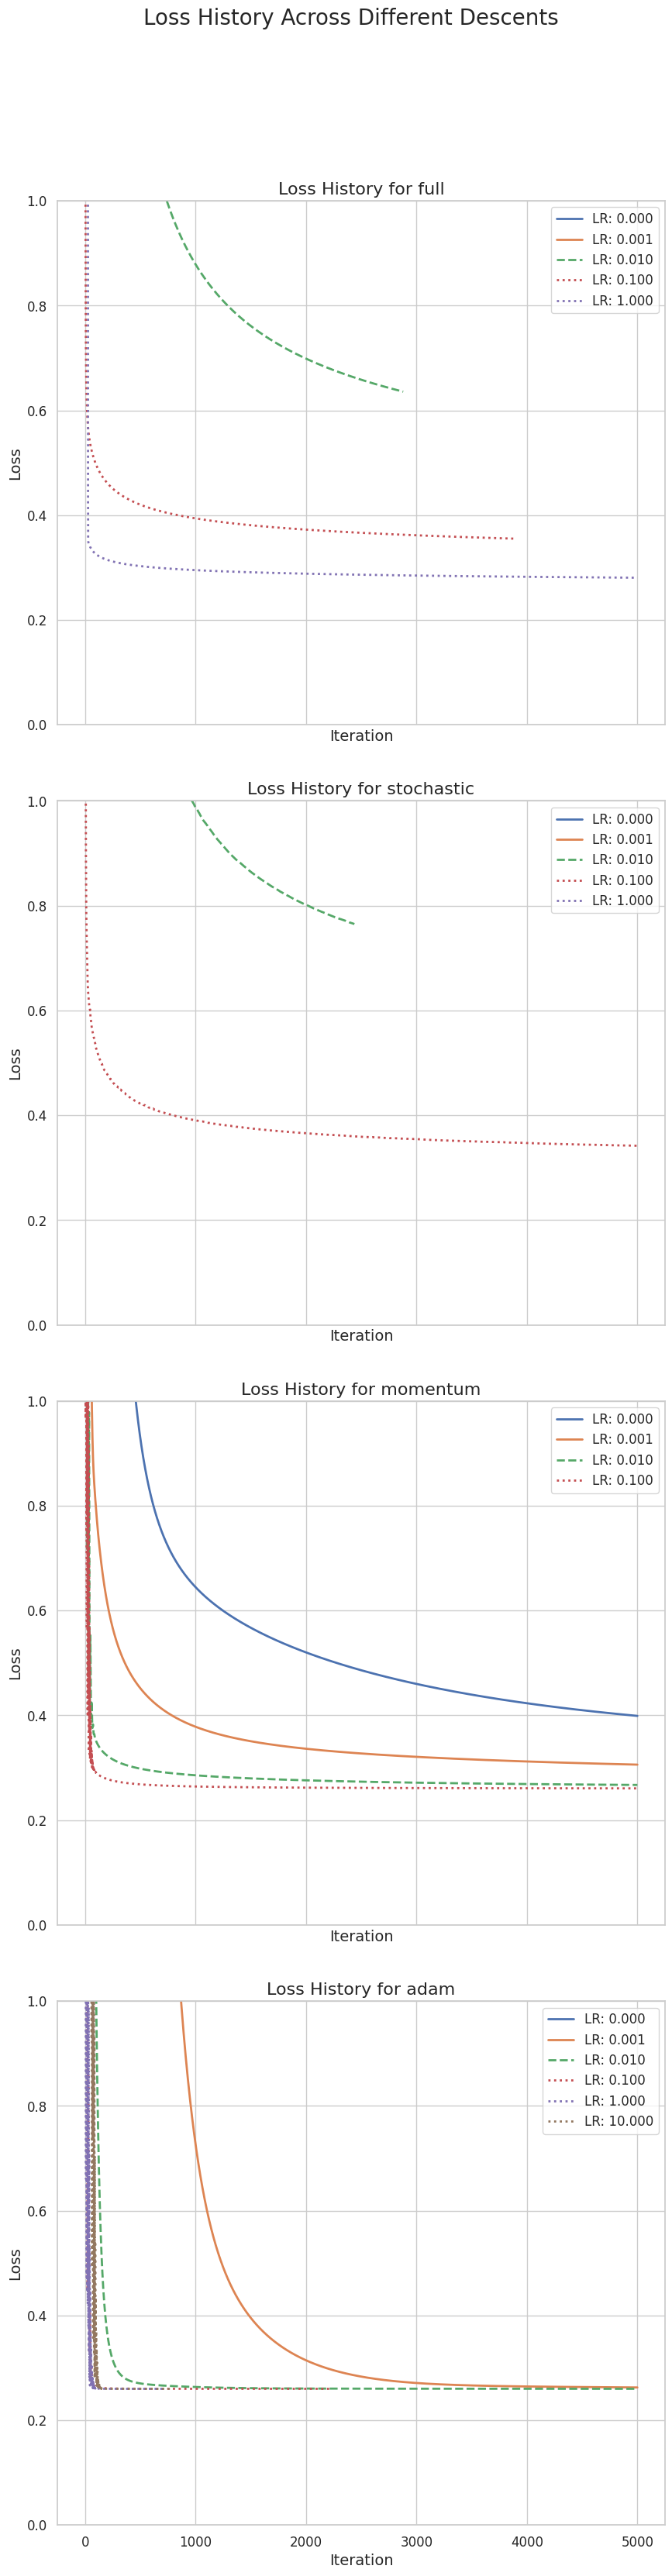

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(len(descents), 1, figsize=(10, 8*len(descents)), sharex=True)
fig.tight_layout(pad=5.0)

for i, result in enumerate(overall_results):
    for lr, history, _, _, _, _ in result['loss_histories']:
        line_style = '-' if lr < 0.01 else '--' if lr < 0.1 else ':'
        axes[i].plot(history, label=f'LR: {lr:.3f}', linestyle=line_style, linewidth=2)

    axes[i].set_title(f'Loss History for {result["descent_name"]}', fontsize=16)
    axes[i].set_xlabel('Iteration', fontsize=14)
    axes[i].set_ylabel('Loss', fontsize=14)
    axes[i].set_ylim([0, 1])
    axes[i].tick_params(labelsize=12)
    axes[i].legend(fontsize=12)

fig.suptitle('Loss History Across Different Descents', fontsize=20, y=1.05)
plt.show()

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

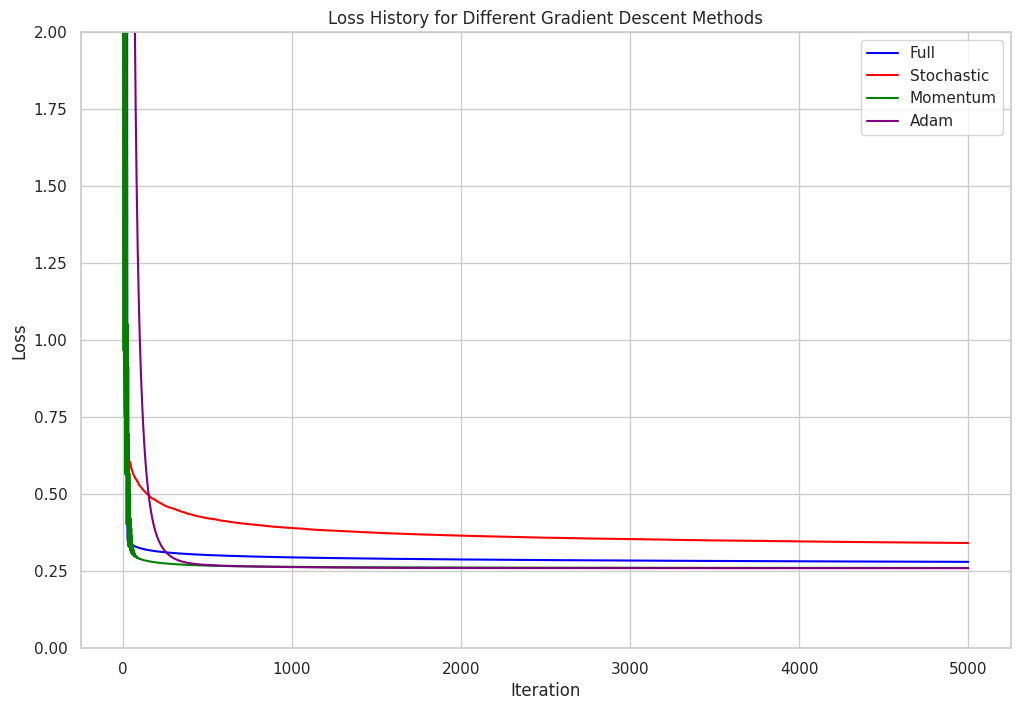

In [63]:
import matplotlib.pyplot as plt

loss_history_full = []
loss_history_stochastic = []
loss_history_momentum = []
loss_history_adam = []

for result in overall_results:
    optimal_loss_history = min(result['loss_histories'], key=lambda x: x[3])[1]

    if result['descent_name'] == 'full':
        loss_history_full = optimal_loss_history
    elif result['descent_name'] == 'stochastic':
        loss_history_stochastic = optimal_loss_history
    elif result['descent_name'] == 'momentum':
        loss_history_momentum = optimal_loss_history
    elif result['descent_name'] == 'adam':
        loss_history_adam = optimal_loss_history

iterations_full = range(len(loss_history_full))
iterations_stochastic = range(len(loss_history_stochastic))
iterations_momentum = range(len(loss_history_momentum))
iterations_adam = range(len(loss_history_adam))

plt.figure(figsize=(12, 8))

plt.plot(iterations_full, loss_history_full, label='Full', color='blue')
plt.plot(iterations_stochastic, loss_history_stochastic, label='Stochastic', color='red')
plt.plot(iterations_momentum, loss_history_momentum, label='Momentum', color='green')
plt.plot(iterations_adam, loss_history_adam, label='Adam', color='purple')

plt.title('Loss History for Different Gradient Descent Methods')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.ylim(0, 2)

plt.show()

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Full метод хорош, но на большом количестве итераций практически не меняется ошибка. Stochastic метод самый медленный с самой большой ошибкой. Adam метод по скорости уступает всем методом, но зато показывает наименьшую ошибку в сравнении с Momentum.

Наиболее походящий здесь Momentum или Adam

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [ ]:
batch_sizes = np.arange(5, 500, 10)

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [65]:
import time

batch_sizes = [5, 10, 20, 30, 50, 80, 100]
k_runs = 10
results = []

for batch_size in batch_sizes:
    time_per_batch = []
    iterations_per_batch = []

    for run in range(k_runs):
        start_time = time.time()
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': x_train.shape[1],
                'batch_size': batch_size,
                'loss_function': LossFunction.MSE
            }
        }
        model = LinearRegression(descent_config=descent_config, max_iter=4000)
        model.fit(x_train, y_train)
        elapsed_time = time.time() - start_time
        iterations = len(model.loss_history)

        time_per_batch.append(elapsed_time)
        iterations_per_batch.append(iterations)

    avg_time = np.mean(time_per_batch)
    avg_iterations = np.mean(iterations_per_batch)

    results.append({
        'batch_size': batch_size,
        'avg_time': avg_time,
        'avg_iterations': avg_iterations
    })

    print(f"Batch Size: {batch_size}, Avg Time: {avg_time:.2f} sec, Avg Iterations: {avg_iterations}")

Convergence achieved after 1505 iterations.
Total iterations: 1505
Convergence achieved after 1469 iterations.
Total iterations: 1469
Convergence achieved after 1253 iterations.
Total iterations: 1253
Convergence achieved after 2073 iterations.
Total iterations: 2073
Convergence achieved after 2436 iterations.
Total iterations: 2436
Convergence achieved after 1529 iterations.
Total iterations: 1529
Convergence achieved after 1334 iterations.
Total iterations: 1334
Convergence achieved after 1854 iterations.
Total iterations: 1854
Convergence achieved after 2188 iterations.
Total iterations: 2188
Convergence achieved after 2968 iterations.
Total iterations: 2968
Batch Size: 5, Avg Time: 8.38 sec, Avg Iterations: 1861.9
Convergence achieved after 1492 iterations.
Total iterations: 1492
Convergence achieved after 2254 iterations.
Total iterations: 2254
Convergence achieved after 2121 iterations.
Total iterations: 2121
Convergence achieved after 1688 iterations.
Total iterations: 1688
Conv

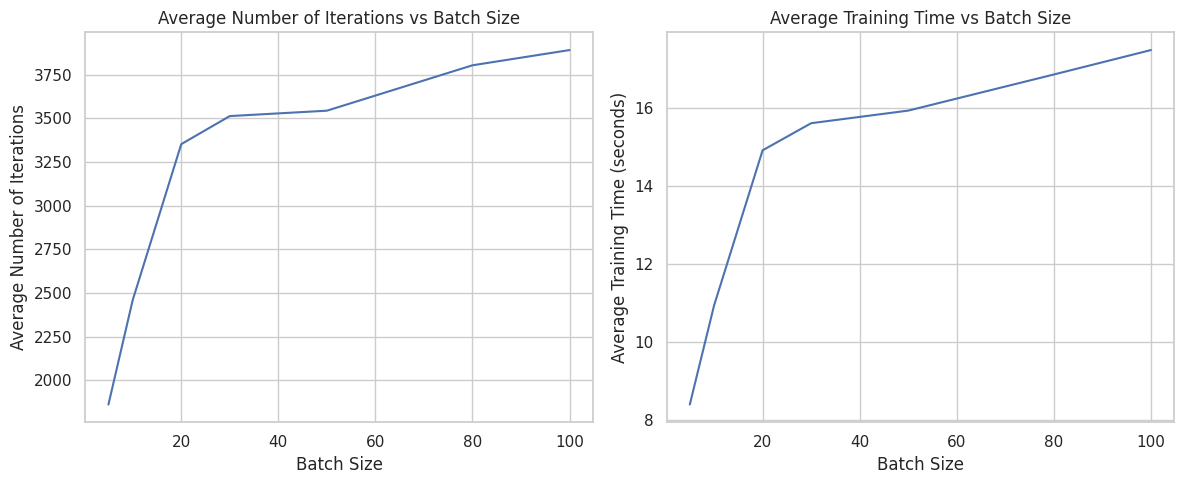

In [67]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot([res['batch_size'] for res in results], [res['avg_iterations'] for res in results])
plt.xlabel('Batch Size')
plt.ylabel('Average Number of Iterations')
plt.title('Average Number of Iterations vs Batch Size')

plt.subplot(1, 2, 2)
plt.plot([res['batch_size'] for res in results], [res['avg_time'] for res in results])
plt.xlabel('Batch Size')
plt.ylabel('Average Training Time (seconds)')
plt.title('Average Training Time vs Batch Size')

plt.tight_layout()
plt.show()

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Небольшие батчи обеспечивают меньшее кол-во итераций до сходимости и быстрее обучаются, на больших батчах не происходит сильного роста в эффективности и увеличивается время обучения.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [69]:
%autoreload 2
from tqdm import tqdm
from linear_regression import LinearRegression
from descents import LossFunction

descents = ["full", "stochastic", "momentum", "adam"]
lambda_values = np.logspace(-4, 1, num=6)
mu_values = np.logspace(-6, 1, num=8)

results = []
for descent_name in tqdm(descents, desc=f"Overall Progress", leave=False):
    loss_histories = []
    convergence_iterations = []

    for mu in mu_values:
        for lr in learning_rates:
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {
                    'dimension': x_train.shape[1],
                    'lambda_': lr,
                    'mu': mu,
                    'loss_function': LossFunction.MSE
                }
            }
            model = LinearRegression(descent_config=descent_config, max_iter=5000)

            try:
              model.fit(x_train, y_train)
            except:
              continue

            train_loss = model.calc_loss(x_train, y_train)
            val_loss = model.calc_loss(x_val, y_val)

            r2_train = model.score(x_train, y_train)
            r2_val = model.score(x_val, y_val)

            if not math.isnan(train_loss) and not math.isnan(val_loss):
                loss_histories.append((lr, mu, model.loss_history, train_loss, val_loss, r2_train, r2_val))
                convergence_iterations.append(len(model.loss_history))

            print(f"Descent name: {descent_name}")
            print(f"Mu: {mu}")
            print(f"Learning rate: {lr}")
            print(f"Train Loss: {train_loss}")
            print(f"Validation Loss: {val_loss}")
            print(f"R^2 on training set: {r2_train}")
            print(f"R^2 on training set: {r2_val}")


    results.append({
        'descent_name': descent_name,
        'loss_histories': loss_histories,
        'convergence_iterations': convergence_iterations
    })

Overall Progress:   0%|          | 0/4 [00:00<?, ?it/s]

Convergence achieved after 291 iterations.
Total iterations: 291
Descent name: full
Mu: 1e-06
Learning rate: 0.0001
Train Loss: 23.903777626365198
Validation Loss: 23.653330832286382
R^2 on training set: -18.349392043280634
R^2 on training set: -18.161381375120655
Total iterations: 5000
Descent name: full
Mu: 1e-06
Learning rate: 0.001
Train Loss: 5.723109981492569
Validation Loss: 5.685259200617141
R^2 on training set: -3.6326861163806434
R^2 on training set: -3.605584749642995
Convergence achieved after 2138 iterations.
Total iterations: 2138
Descent name: full
Mu: 1e-06
Learning rate: 0.01
Train Loss: 0.6191973743878246
Validation Loss: 0.6402948412924127
R^2 on training set: 0.4987782710969825
R^2 on training set: 0.4813020739650168
Convergence achieved after 2927 iterations.
Total iterations: 2927
Descent name: full
Mu: 1e-06
Learning rate: 0.1
Train Loss: 0.3406366158503321
Validation Loss: 0.3534117798110485
R^2 on training set: 0.7242648619222993
R^2 on training set: 0.71370383

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:206: RuntimeWarning: overflow encountered in square
  return np.mean(error ** 2)  # возврат MSE
/content/descents.py:296: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * x.T.dot(error) / len(y)
/content/descents.py:269: RuntimeWarning: invalid value encountered in add
  self.w += weight_difference  # обновляем веса


Training stopped due to NaN values in weights.
Total iterations: 539
Descent name: full
Mu: 1e-06
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: nan
R^2 on training set: 1.0
Convergence achieved after 329 iterations.
Total iterations: 329
Descent name: full
Mu: 1e-05
Learning rate: 0.0001
Train Loss: 26.957048053265687
Validation Loss: 26.802264128494155
R^2 on training set: -20.820923004942944
R^2 on training set: -20.71230801802258
Total iterations: 5000
Descent name: full
Mu: 1e-05
Learning rate: 0.001
Train Loss: 6.356353760275392
Validation Loss: 6.292872497063861
R^2 on training set: -4.145277988935663
R^2 on training set: -4.097807607572068
Convergence achieved after 2425 iterations.
Total iterations: 2425
Descent name: full
Mu: 1e-05
Learning rate: 0.01
Train Loss: 0.7160911444856709
Validation Loss: 0.7286267723143056
R^2 on training set: 0.42034566628112946
R^2 on training set: 0.4097450560586412
Convergence achieved after 3398 iterations.
Total

Overall Progress:  25%|██▌       | 1/4 [24:43<1:14:11, 1483.75s/it]

Training stopped due to NaN values in weights.
Total iterations: 209
Descent name: full
Mu: 10.0
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: nan
R^2 on training set: 1.0
Convergence achieved after 194 iterations.
Total iterations: 194
Descent name: stochastic
Mu: 1e-06
Learning rate: 0.0001
Train Loss: 23.13173399295554
Validation Loss: 22.906387903798812
R^2 on training set: -17.724445845618327
R^2 on training set: -17.556288653943998
Convergence achieved after 3443 iterations.
Total iterations: 3443
Descent name: stochastic
Mu: 1e-06
Learning rate: 0.001
Train Loss: 7.515890952467331
Validation Loss: 7.423742258076313
R^2 on training set: -5.083888616560479
R^2 on training set: -5.013916502762984
Convergence achieved after 1966 iterations.
Total iterations: 1966
Descent name: stochastic
Mu: 1e-06
Learning rate: 0.01
Train Loss: 0.6075847477714316
Validation Loss: 0.6199427279173503
R^2 on training set: 0.5081783445316093
R^2 on training set: 0.497789

/content/descents.py:354: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * x_batch.T.dot(error) / self.batch_size


Convergence achieved after 171 iterations.
Total iterations: 171
Descent name: stochastic
Mu: 1e-05
Learning rate: 0.0001
Train Loss: 17.687586296105728
Validation Loss: 17.488395622472197
R^2 on training set: -13.31757134341905
R^2 on training set: -13.167214779906269
Convergence achieved after 3987 iterations.
Total iterations: 3987
Descent name: stochastic
Mu: 1e-05
Learning rate: 0.001
Train Loss: 8.892331916810406
Validation Loss: 8.806830994901485
R^2 on training set: -6.198076351227557
R^2 on training set: -6.134346050290658
Convergence achieved after 2727 iterations.
Total iterations: 2727
Descent name: stochastic
Mu: 1e-05
Learning rate: 0.01
Train Loss: 0.6440290962715505
Validation Loss: 0.6581277501945632
R^2 on training set: 0.4786777359703518
R^2 on training set: 0.4668557716271037
Total iterations: 5000
Descent name: stochastic
Mu: 1e-05
Learning rate: 0.1
Train Loss: 0.3402214217268303
Validation Loss: 0.3539563898057729
R^2 on training set: 0.7246009491297389
R^2 on tr

Overall Progress:  50%|█████     | 2/4 [35:56<33:33, 1006.77s/it]  

Total iterations: 5000
Descent name: momentum
Mu: 1e-06
Learning rate: 0.0001
Train Loss: 0.4031233141144215
Validation Loss: 0.4192519296295603
R^2 on training set: 0.6736837512250318
R^2 on training set: 0.6603672365279845
Total iterations: 5000
Descent name: momentum
Mu: 1e-06
Learning rate: 0.001
Train Loss: 0.30316556979421916
Validation Loss: 0.3168971558142499
R^2 on training set: 0.7545965514043774
R^2 on training set: 0.743284051523118
Total iterations: 5000
Descent name: momentum
Mu: 1e-06
Learning rate: 0.01
Train Loss: 0.2673105611733647
Validation Loss: 0.2798308443651555
R^2 on training set: 0.7836201069847686
R^2 on training set: 0.7733111853285451
Total iterations: 5000
Descent name: momentum
Mu: 1e-06
Learning rate: 0.1
Train Loss: 0.26067190009969554
Validation Loss: 0.2728273879050595
R^2 on training set: 0.7889939042884722
R^2 on training set: 0.7789846315390373


/content/descents.py:426: RuntimeWarning: invalid value encountered in add
  self.h = self.alpha * self.h + eta * gradient # вектор момента


Training stopped due to NaN values in weights.
Total iterations: 456
Descent name: momentum
Mu: 1e-06
Learning rate: 1.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: nan
R^2 on training set: 1.0
Training stopped due to NaN values in weights.
Total iterations: 169
Descent name: momentum
Mu: 1e-06
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: nan
R^2 on training set: 1.0
Total iterations: 5000
Descent name: momentum
Mu: 1e-05
Learning rate: 0.0001
Train Loss: 0.3878659130708229
Validation Loss: 0.4034200442848126
R^2 on training set: 0.6860341603933519
R^2 on training set: 0.6731925250731314
Total iterations: 5000
Descent name: momentum
Mu: 1e-05
Learning rate: 0.001
Train Loss: 0.3033571356907262
Validation Loss: 0.3166172473165374
R^2 on training set: 0.7544414845487709
R^2 on training set: 0.7435108032441688
Total iterations: 5000
Descent name: momentum
Mu: 1e-05
Learning rate: 0.01
Train Loss: 0.26652337790175407
Validation Loss: 0.2786627

Overall Progress:  75%|███████▌  | 3/4 [57:37<19:00, 1140.92s/it]

Training stopped due to NaN values in weights.
Total iterations: 127
Descent name: momentum
Mu: 10.0
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: nan
R^2 on training set: 1.0
Total iterations: 5000
Descent name: adam
Mu: 1e-06
Learning rate: 0.0001
Train Loss: 4.868667677250667
Validation Loss: 4.906545855665317
R^2 on training set: -2.941040662613317
R^2 on training set: -2.974755058454193
Total iterations: 5000
Descent name: adam
Mu: 1e-06
Learning rate: 0.001
Train Loss: 0.2640121885131303
Validation Loss: 0.2755121637405773
R^2 on training set: 0.7862900408632247
R^2 on training set: 0.7768097152849237
Total iterations: 5000
Descent name: adam
Mu: 1e-06
Learning rate: 0.01
Train Loss: 0.26002509190132994
Validation Loss: 0.2721117160386907
R^2 on training set: 0.7895174761524096
R^2 on training set: 0.7795643918133162
Total iterations: 5000
Descent name: adam
Mu: 1e-06
Learning rate: 0.1
Train Loss: 0.2600127164800168
Validation Loss: 0.272088540607

Convergence achieved after 270 iterations.
Total iterations: 270
Descent name: adam
Mu: 10.0
Learning rate: 10.0
Train Loss: 39.86330306737222
Validation Loss: 39.7345665315709
R^2 on training set: -31.26814988188061
R^2 on training set: -31.188666724573075


In [70]:
for result in results:
    combined_results = [
        (
            lr,
            mu,
            history,
            train_loss,
            val_loss,
            iterations,
            r2_train,
            r2_val
        ) for (lr, mu, history, train_loss, val_loss, r2_train, r2_val), iterations in zip(result['loss_histories'], result['convergence_iterations'])
    ]

    best_lr, best_mu, best_history, best_train_loss, best_val_loss, best_iterations, best_r2_train, best_r2_val = min(
        combined_results,
        key=lambda x: x[4]
    )

    descent_name = result['descent_name']
    print(f"Лучшие результаты для метода {descent_name}:")
    print(f"Оптимальное значение λ: {best_lr}")
    print(f"Оптимальное значение Mu: {best_mu}")
    print(f"Потеря на тренировочной выборке: {best_train_loss}")
    print(f"Потеря на валидационной выборке: {best_val_loss}")
    print(f"Количество итераций до сходимости: {best_iterations}")
    print(f"R^2 на тренировочной выборке: {best_r2_train}")
    print(f"R^2 на валидационной выборке: {best_r2_val}\n")

Лучшие результаты для метода full:
Оптимальное значение λ: 1.0
Оптимальное значение Mu: 0.001
Потеря на тренировочной выборке: 0.2789074639831242
Потеря на валидационной выборке: 0.2929278125719
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.7742327615006657
R^2 на валидационной выборке: 0.762701432120988

Лучшие результаты для метода stochastic:
Оптимальное значение λ: 0.1
Оптимальное значение Mu: 0.01
Потеря на тренировочной выборке: 0.33428783987210514
Потеря на валидационной выборке: 0.34776843083467657
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.72940400592363
R^2 на валидационной выборке: 0.7182754690787717

Лучшие результаты для метода momentum:
Оптимальное значение λ: 0.1
Оптимальное значение Mu: 1e-05
Потеря на тренировочной выборке: 0.26063894842935925
Потеря на валидационной выборке: 0.27261908991763073
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.7890205776786694
R^2 на валидационной выборке: 0.

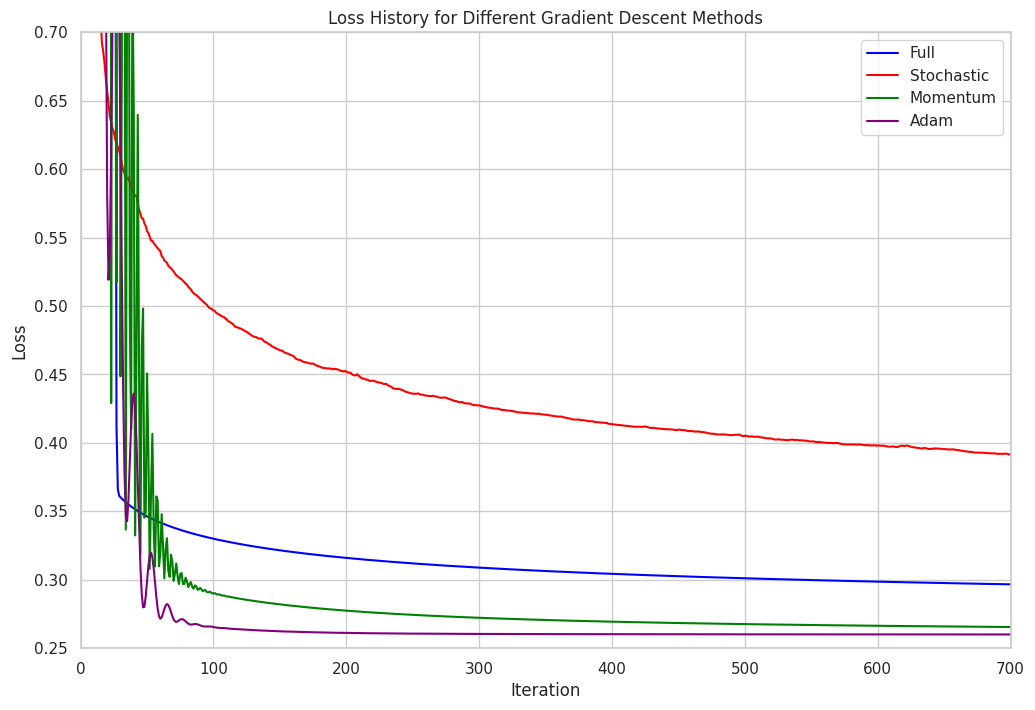

In [72]:
loss_history_full = []
loss_history_stochastic = []
loss_history_momentum = []
loss_history_adam = []

for result in results:
    optimal_loss_history = min(result['loss_histories'], key=lambda x: x[4])[2]

    if result['descent_name'] == 'full':
        loss_history_full = optimal_loss_history
    elif result['descent_name'] == 'stochastic':
        loss_history_stochastic = optimal_loss_history
    elif result['descent_name'] == 'momentum':
        loss_history_momentum = optimal_loss_history
    elif result['descent_name'] == 'adam':
        loss_history_adam = optimal_loss_history

iterations_full = range(len(loss_history_full))
iterations_stochastic = range(len(loss_history_stochastic))
iterations_momentum = range(len(loss_history_momentum))
iterations_adam = range(len(loss_history_adam))

plt.figure(figsize=(12, 8))

plt.plot(iterations_full, loss_history_full, label='Full', color='blue')
plt.plot(iterations_stochastic, loss_history_stochastic, label='Stochastic', color='red')
plt.plot(iterations_momentum, loss_history_momentum, label='Momentum', color='green')
plt.plot(iterations_adam, loss_history_adam, label='Adam', color='purple')

plt.title('Loss History for Different Gradient Descent Methods')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.ylim(0.25, 0.7)
plt.xlim(0, 700)


plt.show()

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Использовании регуляризации в основном не принесло существенных изменений, единственное отличие наблюдается в Adam по сравнению с Momentum, здесь уже Adam показывает наилучший результат в отличие от реализации без регуляризации

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [73]:
%autoreload 2

import numpy as np
import math
import matplotlib.pyplot as plt

from linear_regression import LinearRegression
from descents import LossFunction

descents = ["full", "stochastic", "momentum", "adam"]
learning_rates = np.logspace(-4, 1, num=6)

overall_results = []

for descent_name in descents:
    print(f"\n{'='*40}\n{descent_name.upper()} DESCENT\n{'='*40}")

    loss_histories = []
    convergence_iterations = []

    for lr in learning_rates:
        print(f"\n-- Learning Rate: {lr:.1e} --")

        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': lr,
                'loss_function': LossFunction.LogCosh
            }
        }
        model = LinearRegression(descent_config=descent_config, max_iter=5000)

        try:
          model.fit(x_train, y_train)
        except:
          continue

        train_loss = model.calc_loss(x_train, y_train)
        val_loss = model.calc_loss(x_val, y_val)

        r2_train = model.score(x_train, y_train)
        r2_val = model.score(x_val, y_val)

        if not math.isnan(train_loss) and not math.isnan(val_loss):
            loss_histories.append((lr, model.loss_history, train_loss, val_loss, r2_train, r2_val))
            convergence_iterations.append(len(model.loss_history))

        print(f"Train Loss: {train_loss:.4f}")
        print(f"Validation Loss: {val_loss:.4f}")
        print(f"R^2 on Training: {r2_train:.4f}")
        print(f"R^2 on Validation: {r2_val:.4f}")

    overall_results.append({
        'descent_name': descent_name,
        'loss_histories': loss_histories,
        'convergence_iterations': convergence_iterations
    })


FULL DESCENT

-- Learning Rate: 1.0e-04 --
Convergence achieved after 4 iterations.
Total iterations: 4
Train Loss: 3.9526
Validation Loss: 3.9258
R^2 on Training: -20.2191
R^2 on Validation: -20.0227

-- Learning Rate: 1.0e-03 --
Convergence achieved after 331 iterations.
Total iterations: 331
Train Loss: 5.3799
Validation Loss: 5.3548
R^2 on Training: -30.7570
R^2 on Validation: -30.5274

-- Learning Rate: 1.0e-02 --
Total iterations: 5000
Train Loss: 8.1248
Validation Loss: 8.0993
R^2 on Training: -64.5105
R^2 on Validation: -64.1806

-- Learning Rate: 1.0e-01 --
Total iterations: 5000
Train Loss: 50.6293
Validation Loss: 50.5308
R^2 on Training: -2160.1182
R^2 on Validation: -2154.0638

-- Learning Rate: 1.0e+00 --
Total iterations: 5000
Train Loss: 467.7962
Validation Loss: 467.0234
R^2 on Training: -180058.2258
R^2 on Validation: -179656.7325

-- Learning Rate: 1.0e+01 --


/content/descents.py:208: RuntimeWarning: overflow encountered in cosh
  log_cosh = np.log(np.cosh(y_pred - y))


Total iterations: 5000
Train Loss: inf
Validation Loss: inf
R^2 on Training: -17641961.9110
R^2 on Validation: -17604039.0824

STOCHASTIC DESCENT

-- Learning Rate: 1.0e-04 --


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)


Convergence achieved after 258 iterations.
Total iterations: 258
Train Loss: 28.4451
Validation Loss: 28.1824
R^2 on Training: -22.0254
R^2 on Validation: -21.8304

-- Learning Rate: 1.0e-03 --
Convergence achieved after 2748 iterations.
Total iterations: 2748
Train Loss: 5.6253
Validation Loss: 5.5889
R^2 on Training: -3.5535
R^2 on Validation: -3.5275

-- Learning Rate: 1.0e-02 --
Convergence achieved after 2130 iterations.
Total iterations: 2130
Train Loss: 0.7830
Validation Loss: 0.7896
R^2 on Training: 0.3662
R^2 on Validation: 0.3603

-- Learning Rate: 1.0e-01 --
Total iterations: 5000
Train Loss: 0.3525
Validation Loss: 0.3642
R^2 on Training: 0.7146
R^2 on Validation: 0.7050

-- Learning Rate: 1.0e+00 --
Total iterations: 5000
Train Loss: 625.2267
Validation Loss: 646.0987
R^2 on Training: -505.1023
R^2 on Validation: -522.3996

-- Learning Rate: 1.0e+01 --

MOMENTUM DESCENT

-- Learning Rate: 1.0e-04 --
Total iterations: 5000
Train Loss: 0.3967
Validation Loss: 0.4105
R^2 on T

In [74]:
for result in overall_results:
    # Создание списка словарей для каждого результата
    combined_results = [
        {
            'learning_rate': lr,
            'history': history,
            'train_loss': train_loss,
            'val_loss': val_loss,
            'iterations': iterations,
            'r2_train': r2_train,
            'r2_val': r2_val
        }
        for (lr, history, train_loss, val_loss, r2_train, r2_val), iterations
        in zip(result['loss_histories'], result['convergence_iterations'])
    ]

    # Поиск лучшего результата на основе потери на валидационной выборке
    best_result = min(combined_results, key=lambda x: x['val_loss'])

    # Подготовка и вывод информации о лучшем результате
    descent_name = result['descent_name']
    print("-" * 40)
    print(f"Метод: {descent_name.upper()}")
    print("-" * 40)
    print(f"Оптимальное значение λ: {best_result['learning_rate']:.5f}")
    print(f"Потеря на тренировочной выборке: {best_result['train_loss']:.4f}")
    print(f"Потеря на валидационной выборке: {best_result['val_loss']:.4f}")
    print(f"Количество итераций до сходимости: {best_result['iterations']}")
    print(f"R^2 на тренировочной выборке: {best_result['r2_train']:.4f}")
    print(f"R^2 на валидационной выборке: {best_result['r2_val']:.4f}\n")

----------------------------------------
Метод: FULL
----------------------------------------
Оптимальное значение λ: 0.00010
Потеря на тренировочной выборке: 3.9526
Потеря на валидационной выборке: 3.9258
Количество итераций до сходимости: 5
R^2 на тренировочной выборке: -20.2191
R^2 на валидационной выборке: -20.0227

----------------------------------------
Метод: STOCHASTIC
----------------------------------------
Оптимальное значение λ: 0.10000
Потеря на тренировочной выборке: 0.3525
Потеря на валидационной выборке: 0.3642
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.7146
R^2 на валидационной выборке: 0.7050

----------------------------------------
Метод: MOMENTUM
----------------------------------------
Оптимальное значение λ: 0.10000
Потеря на тренировочной выборке: 0.2606
Потеря на валидационной выборке: 0.2725
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.7890
R^2 на валидационной выборке: 0.7793

--------------------------

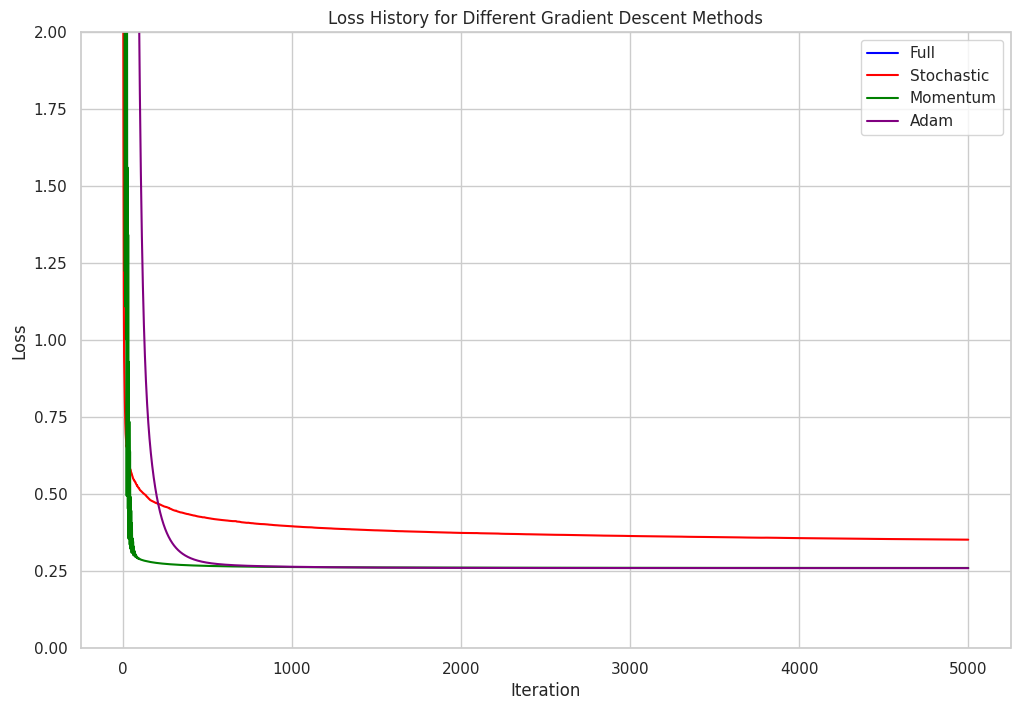

In [75]:
import matplotlib.pyplot as plt

loss_history_full = []
loss_history_stochastic = []
loss_history_momentum = []
loss_history_adam = []

for result in overall_results:
    optimal_loss_history = min(result['loss_histories'], key=lambda x: x[3])[1]

    if result['descent_name'] == 'full':
        loss_history_full = optimal_loss_history
    elif result['descent_name'] == 'stochastic':
        loss_history_stochastic = optimal_loss_history
    elif result['descent_name'] == 'momentum':
        loss_history_momentum = optimal_loss_history
    elif result['descent_name'] == 'adam':
        loss_history_adam = optimal_loss_history

iterations_full = range(len(loss_history_full))
iterations_stochastic = range(len(loss_history_stochastic))
iterations_momentum = range(len(loss_history_momentum))
iterations_adam = range(len(loss_history_adam))

plt.figure(figsize=(12, 8))

plt.plot(iterations_full, loss_history_full, label='Full', color='blue')
plt.plot(iterations_stochastic, loss_history_stochastic, label='Stochastic', color='red')
plt.plot(iterations_momentum, loss_history_momentum, label='Momentum', color='green')
plt.plot(iterations_adam, loss_history_adam, label='Adam', color='purple')

plt.title('Loss History for Different Gradient Descent Methods')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.ylim(0, 2)

plt.show()

Full и Momentum сошлись немного быстрее, но в целом ничего особо не поменялось
